# L7 - Norbert Frydrysiak
Implement the Metropolis-Hastings (M-H) algorithm for the task described in file L7.pdf under '(6) A very simple continuous example'. Investigate the influence of the delta parameter. Draw an interesting plot where the X-axis is log(delta) and the Y-axis... I'll leave that to your creativity.

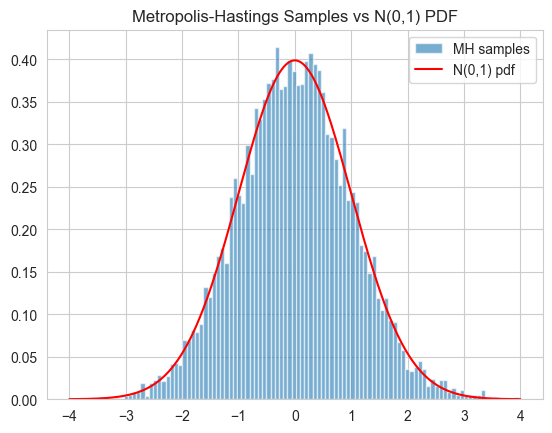

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm
np.random.seed(42)

def metropolis_hastings_normal(target_density, delta, num_samples, x0=0.0):
    samples = np.zeros(num_samples)
    samples[0] = x0
    acceptances = 0

    for t in range(1, num_samples):
        y = samples[t-1] + np.random.uniform(-delta, delta)
        alpha = min(1, target_density(y) / target_density(samples[t-1]))

        if np.random.rand() <= alpha:
            samples[t] = y
            acceptances += 1
        else:
            samples[t] = samples[t-1]

    acceptance_rate = acceptances / (num_samples - 1)
    return samples, acceptance_rate

target_density = lambda x: np.exp(-x**2 / 2)

delta = 1.0           
num_samples = 10000   

samples,_ = metropolis_hastings_normal(target_density, delta, num_samples)

plt.hist(samples, bins=100, density=True, alpha=0.6, label='MH samples')
x = np.linspace(-4, 4, 1000)
plt.plot(x, 1/np.sqrt(2*np.pi) * np.exp(-x**2 / 2), 'r', label='N(0,1) pdf')
plt.legend()
plt.title("Metropolis-Hastings Samples vs N(0,1) PDF")
plt.show()


100%|██████████| 500/500 [00:12<00:00, 40.58it/s]


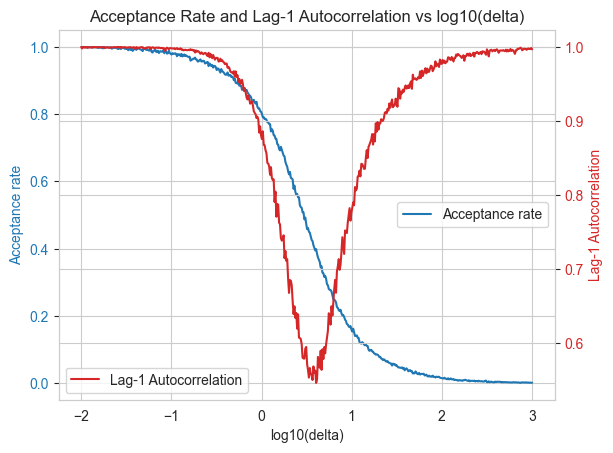

In [2]:
# Parametry
num_samples = 10000
deltas = np.logspace(-2, 3, 500)
acceptance_rates = []
autocorrelations = []

for delta in tqdm.tqdm(deltas):
    samples, acc_rate = metropolis_hastings_normal(target_density, delta, num_samples)
    acceptance_rates.append(acc_rate)

    # (lag-1)
    centered = samples - np.mean(samples)
    autocorr = np.corrcoef(centered[:-1], centered[1:])[0, 1]
    autocorrelations.append(autocorr)

fig, ax1 = plt.subplots()

color = 'tab:blue'
ax1.set_xlabel('log10(delta)')
ax1.set_ylabel('Acceptance rate', color=color)
ax1.plot(np.log10(deltas), acceptance_rates, color=color, label='Acceptance rate')
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='center right')

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Lag-1 Autocorrelation', color=color)
ax2.plot(np.log10(deltas), autocorrelations, color=color, label='Lag-1 Autocorrelation')
ax2.tick_params(axis='y', labelcolor=color)
ax2.legend(loc='lower left')

plt.title("Acceptance Rate and Lag-1 Autocorrelation vs log10(delta)")
plt.grid(True)
plt.show()

## Analysis of the Effect of `δ` in the Metropolis-Hastings Algorithm

The plot shows how the choice of the proposal distribution width `δ` influences two key characteristics of the Metropolis-Hastings sampling process:

- **Acceptance rate** — the proportion of proposed values that are accepted.
- **Lag-1 autocorrelation** — a measure of how strongly each sample depends on the previous one.

The x-axis shows $ \log_{10}(\delta) $, and the y-axes represent the **acceptance rate** and **lag-1 autocorrelation**, respectively.

---

###  What is Lag-1 Autocorrelation?

The **lag-1 autocorrelation** measures the linear dependence between successive samples in the Markov chain. For a sequence $ (X_t) $, it is defined as:

$
\rho(1) = \frac{\mathrm{Cov}(X_t, X_{t+1})}{\sqrt{\mathrm{Var}(X_t)\mathrm{Var}(X_{t+1})}}
$

It reflects how similar a sample $ X_{t+1} $ is to its predecessor $ X_t $. High values mean the samples are strongly correlated and the chain mixes slowly.

---

###  Observations from the Plot

- For **small $ \delta $**:
  - High acceptance rate (close to 1),
  - High lag-1 autocorrelation → poor mixing time for the chain
  
- For **large $ \delta $ bigger than 10**:
    - Acceptance rate drops significantly, inefficient due to many repeated states
    - Lag-1 autocorrelation high

- For **moderate $ \delta $** (around $\sqrt{10}$):
  - Balanced acceptance rate (around 0.2-0.5),
  - Lag-1 autocorrelation is lower, indicating better mixing.

---

### ✅ Conclusion

Choosing a good value for $ \delta $ is **crucial**:

- Too small → correlated samples,
- Too large → many rejections,
- Well-tuned → efficient exploration of the target distribution.

The goal is to **maximize effective sample quality**, not just quantity. A good heuristic is to aim for an **acceptance rate between 0.2 and 0.5**
